In [1]:
from pediatricIQphantoms.make_phantoms import mirt_sim
import matplotlib.pyplot as plt

In [2]:
mirt_sim?

Signature:
mirt_sim(
    phantom='CCT189',
    patient_diameter=200,
    reference_diameter=200,
    reference_fov=340,
    I0=300000.0,
    nb=900,
    na=580,
    ds=1,
    sid=595,
    sdd=1085.6,
    offset_s=1.25,
    down=1,
    has_bowtie=False,
    add_noise=True,
    aec_on=True,
    nx=512,
    fov=340,
    fbp_kernel='hanning,2.05',
    nsims=1,
    relative_lesion_diameter=False,
)
Docstring: Python wrapper for calling Michigan Image Reconstruction Toolbox (MIRT) Octave function 
File:      ~/Dev/PediatricCTSizeAugmentation/.data_aug_torch/lib/python3.11/site-packages/pediatricIQphantoms/make_phantoms.py
Type:      function

In [3]:
res = mirt_sim('CTP404')

The variable "irtdir" is not set, so trying default, assuming
that you launched matlab from the irt install directory.
You may need to edit setup.m or adjust your path otherwise.
Assuming you installed irt in directory "/home/brandon.nelson/Dev/PediatricCTSizeAugmentation/.data_aug_torch/lib/python3.11/site-packages/pediatricIQphantoms/mirt-main".
Path setup for irt appears to have succeeded.
Warn: sino_geom 154: strip_width=0 is rarely realistic! are you sure?
Warn: sino_geom 156: called from "ct_sim : 10"
ellipse_im: 6 of 10 0.0
Warn: jf 92: maxNumCompThreads failed; reverting to 1 thread
ct_sim, simulation: [1/1]
fbp2_back_fan: 80 of 580 0.0
fbp2_back_fan: 161 of 580 0.0
fbp2_back_fan: 242 of 580 0.1
fbp2_back_fan: 313 of 580 0.1
fbp2_back_fan: 385 of 580 0.1
fbp2_back_fan: 457 of 580 0.1
fbp2_back_fan: 529 of 580 0.1


In [4]:
res.keys()

dict_keys(['recon', 'ground_truth', 'sinogram_noiseless'])

In [5]:
res.recon.shape

(1, 512, 512)

In [6]:
def ctshow(img, win=None, lvl=None):
    if img.ndim > 2: img = img[0]
    if (win is None) or (lvl is None):
        vmin = None
        vmax = None
    else:
        vmin = lvl-win/2
        vmax = lvl+win/2
    plt.imshow(img, cmap='gray', vmin=vmin, vmax=vmax)
    plt.colorbar()

Text(0.5, 1.0, 'Ground Truth')

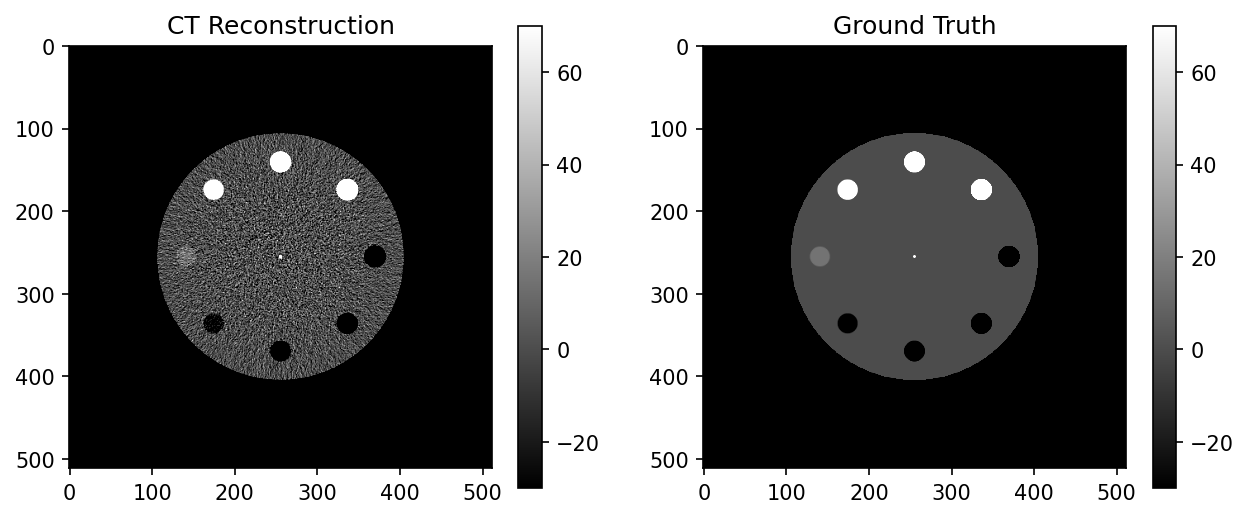

In [7]:
plt.figure(figsize=(10,4), dpi=150)
plt.subplot(1,2,1)
win, lvl = 100, 20
ctshow(res.recon, win, lvl)
plt.title('CT Reconstruction')
plt.subplot(1,2,2)
ctshow(res.ground_truth, win, lvl)
plt.title('Ground Truth')

Text(0, 0.5, 'detector index')

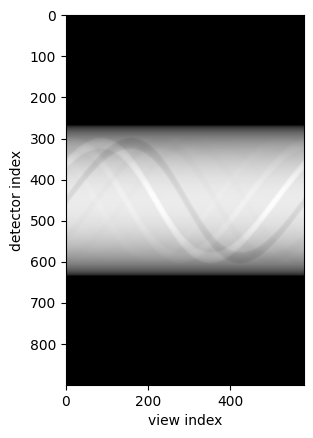

In [8]:
import numpy as np
plt.imshow(-np.log(res.sinogram_noiseless), cmap='gray')
plt.xlabel('view index')
plt.ylabel('detector index')

## Different Phantoms

In [9]:
ctp404 = mirt_sim('CTP404')
cct189 = mirt_sim('CCT189', I0=3e7) # <-- higher dose to show low contrast lesions
uniform = mirt_sim('uniform')

The variable "irtdir" is not set, so trying default, assuming
that you launched matlab from the irt install directory.
You may need to edit setup.m or adjust your path otherwise.
Assuming you installed irt in directory "/home/brandon.nelson/Dev/PediatricCTSizeAugmentation/.data_aug_torch/lib/python3.11/site-packages/pediatricIQphantoms/mirt-main".
Path setup for irt appears to have succeeded.
Warn: sino_geom 154: strip_width=0 is rarely realistic! are you sure?
Warn: sino_geom 156: called from "ct_sim : 10"
ellipse_im: 6 of 10 0.0
ct_sim, simulation: [1/1]
fbp2_back_fan: 81 of 580 0.0
fbp2_back_fan: 163 of 580 0.0
fbp2_back_fan: 246 of 580 0.1
fbp2_back_fan: 328 of 580 0.1
fbp2_back_fan: 410 of 580 0.1
fbp2_back_fan: 490 of 580 0.1
fbp2_back_fan: 575 of 580 0.1
The variable "irtdir" is not set, so trying default, assuming
that you launched matlab from the irt install directory.
You may need to edit setup.m or adjust your path otherwise.
Assuming you installed irt in directory "/home/br

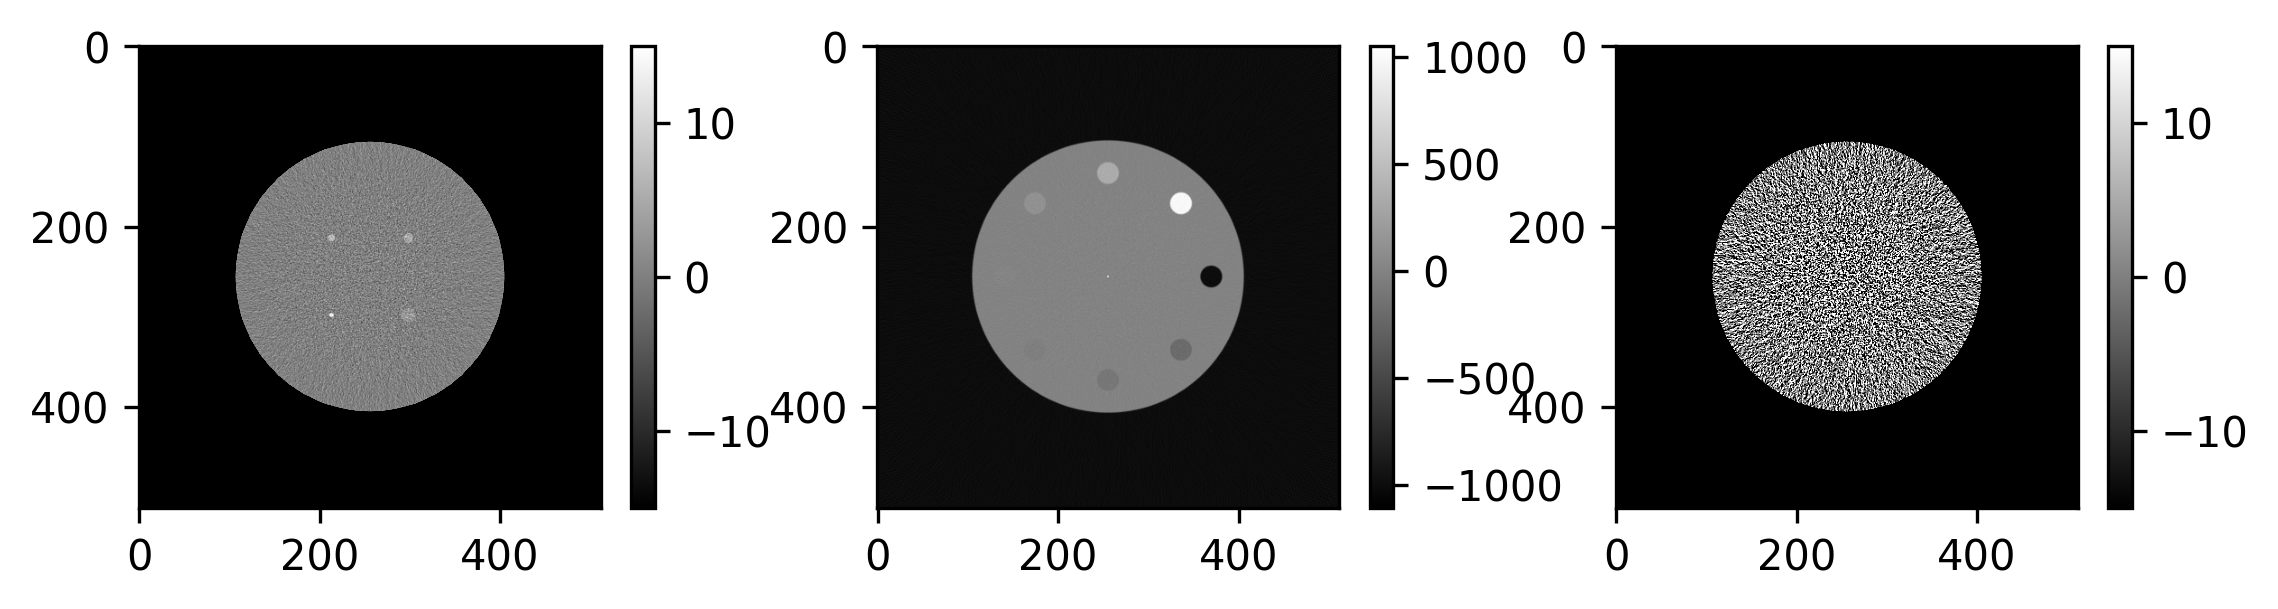

In [10]:
plt.figure(figsize=(9, 2), dpi=300)

plt.subplot(1,3,1)
ctshow(cct189.recon, 30, 0)

plt.subplot(1,3,2)
ctshow(ctp404.recon)

plt.subplot(1,3,3)
ctshow(uniform.recon, 30, 0)
plt.show()

## Different Dose Levels

In [11]:
import numpy as np
doses = np.linspace(1e5, 8e5, 50)
res_list = [mirt_sim('Uniform', I0=I0, nsims=2) for I0 in doses]

The variable "irtdir" is not set, so trying default, assuming
that you launched matlab from the irt install directory.
You may need to edit setup.m or adjust your path otherwise.
Assuming you installed irt in directory "/home/brandon.nelson/Dev/PediatricCTSizeAugmentation/.data_aug_torch/lib/python3.11/site-packages/pediatricIQphantoms/mirt-main".
Path setup for irt appears to have succeeded.
Warn: sino_geom 154: strip_width=0 is rarely realistic! are you sure?
Warn: sino_geom 156: called from "ct_sim : 10"
ct_sim, simulation: [1/2]
fbp2_back_fan: 84 of 580 0.0
fbp2_back_fan: 166 of 580 0.0
fbp2_back_fan: 247 of 580 0.1
fbp2_back_fan: 327 of 580 0.1
fbp2_back_fan: 410 of 580 0.1
fbp2_back_fan: 492 of 580 0.1
fbp2_back_fan: 572 of 580 0.1
ct_sim, simulation: [2/2]
fbp2_back_fan: 85 of 580 0.0
fbp2_back_fan: 161 of 580 0.0
fbp2_back_fan: 230 of 580 0.1
fbp2_back_fan: 305 of 580 0.1
fbp2_back_fan: 384 of 580 0.1
fbp2_back_fan: 464 of 580 0.1
fbp2_back_fan: 540 of 580 0.1
The variable "irt

In [12]:
len(res_list)

50

NameError: name 'nx' is not defined

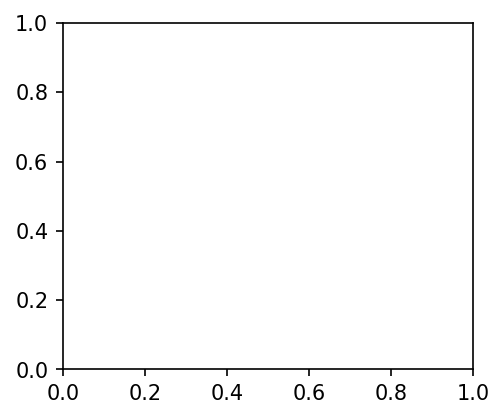

In [13]:
nres = 3
std_noise = []
plt.figure(figsize=(nres*4, nres), dpi=150)
for idx, res in enumerate(res_list):
    if idx//3 == 0:
        plt.subplot(1, nres, idx+1)
        ctshow(res.recon[0, nx//2-nx//8:nx//2+nx//8, nx//2-nx//8:nx//2+nx//8], 100, 0)
    nz, nx, ny = res.recon.shape
    std_noise.append(res.recon[0, nx//2-nx//8:nx//2+nx//8, nx//2-nx//8:nx//2+nx//8].std())
    plt.title(f'Photons/pixel {doses[idx]:1.1g}\nstd: {std_noise[idx]:2.2f} HU')

In [ ]:
plt.plot(doses, std_noise)

In [ ]:
  fpath = get_testdata_file("CT_small.dcm")
  ds = dcmread(fpath)

In [ ]:
ds.SliceLocation

In [ ]:
fpath = get_testdata_file("CT_small.dcm")
ds = dcmread(fpath)

In [ ]:
ds.pixel_array.shape

In [ ]:
from pydicom import dcmread, dcmwrite
from pydicom.data import get_testdata_file
from pathlib import Path
def write_to_dicom(img, fname):
  fpath = get_testdata_file("CT_small.dcm")
  ds = dcmread(fpath)
  # if img.ndim > 2:
  #    return write_dicom_vol(img, fname)
  ds.Rows, ds.Columns = img.shape[-2:]
  ds.PixelData = img.astype('int16').tobytes()
  dcmwrite(fname, ds)

def write_dicom_vol(img, fname):
    fname = Path(fname)
    imdir = fname.parent / fname.stem
    imdir.mkdir(exist_ok=True, parents=True)
    for idx, slc in enumerate(img):
      write_to_dicom(slc, imdir/f'{fname.stem}_{idx:03d}.dcm')

In [ ]:
for d, res in zip(doses, res_list):
    write_to_dicom(res['recon'], f'{int(d)}.dcm')

In [ ]:
plt.imshow(ctp404['sinogram_noiseless'], cmap='gray')
plt.colorbar()

In [ ]:
std_noise[0]

## Recon Type

In [ ]:
cutoff_freq = [0.5, 0.85, 2.05]

res_list = [mirt_sim('CCT189', I0=1e6, fbp_kernel=f'hanning,{freq:1.2f}') for freq in cutoff_freq]    

In [ ]:
nres = len(res_list)
plt.figure(figsize=(nres*4, nres), dpi=150)
for idx, res in enumerate(res_list):
    plt.subplot(1, nres, idx+1)
    ctshow(res.recon, 30, 0)
    plt.title(f'Kernel cutoff {cutoff_freq[idx]}')

## Phantom Size and FOV
(most important piece)

In [ ]:
phantom_diameters = [112, 185, 292]

res_list = [mirt_sim('CCT189', I0=1e6, patient_diameter=d) for d in phantom_diameters]   

In [ ]:
fov = np.array(phantom_diameters)*1.1 # in mm
dx = fov/res.recon.shape[-1]

nres = len(res_list)
plt.figure(figsize=(nres*4, nres), dpi=150)
for idx, res in enumerate(res_list):
    plt.subplot(1, nres, idx+1)
    ctshow(res.recon, 30, 0)
    plt.title(f'Phantom Diameter {phantom_diameters[idx]} [mm]\n(FOV: {fov[idx]:2.0f} mm, voxel size: {dx[idx]:2.2f} mm)', fontsize=8)

By default when FOV is not specified, it defaults to a body fitting 1.1x the phantom diameter. Note how FOV changes the relative pixel size

In [ ]:
res = mirt_sim('CCT189', I0=1e6, patient_diameter=112, fov=500)
ctshow(res.recon, 30, 0)

*Seems FOV not changing anything need to list as a fix*